![alt text](https://drive.google.com/uc?export=view&id=1UXScsVx_Wni_JuDdB8LeTnM6jsPfIwkW)

Proprietary content. © Great Learning. All Rights Reserved. Unauthorized use or distribution prohibited.

# COMPUTER VISION

• PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo.

• DOMAIN: Botanical Research

• CONTEXT: University X is currently undergoing some research involving understanding the characteristics of plant and plant seedlings at various stages of growth. They already have have invested on curating sample images. They require an automation which can create a classifier capable of determining a plant's species from a photo.

• DATA DESCRIPTION: The dataset comprises of images from 12 plant species.

• PROJECT OBJECTIVE: To create a classifier capable of determining a plant's species from a photo.

# Mounting the drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the necessary libraries

In [2]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import zipfile
from zipfile import ZipFile

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import utils
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

import keras
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

import cv2
from google.colab.patches import cv2_imshow

# 1. Import and Understand the data

### Extract ‘plant-seedlings-classification.zip’ into new folder (unzipped) using python

In [3]:
## Initializing the main file path:

file_path = '/content/drive/MyDrive/AIML/CNN'

#### Using the built-in ZipFile function to extract the contents within the zip file

In [10]:
with ZipFile('/content/drive/MyDrive/AIML/CNN/Dataset - Plant-seedlings-classification.zip', 'r') as f:
  f.extractall(file_path + '/Plant_Seedlings_Classification')

#extract in different directory

 

In [11]:
train_path = os.path.join(file_path + '/Plant_Seedlings_Classification/' + '/train')
test_path = os.path.join(file_path + '/Plant_Seedlings_Classification/' + '/test')

In [12]:
os.listdir(train_path)    ## checking the contents within the train path

['Black-grass',
 'Charlock',
 'Cleavers',
 'Common Chickweed',
 'Common wheat',
 'Fat Hen',
 'Loose Silky-bent',
 'Maize',
 'Scentless Mayweed',
 'Shepherds Purse',
 'Small-flowered Cranesbill',
 'Sugar beet']

#### Specifying the count of images in each folder

In [13]:
image_generator = ImageDataGenerator()

train_data = image_generator.flow_from_directory(train_path , target_size = (128, 128))

Found 4750 images belonging to 12 classes.


#### Plotting the frequency of images for each individual class

In [16]:
unique, counts = np.unique(train_data.classes, return_counts=True)
dict1 = dict(zip(train_data.class_indices, counts))

keys = dict1.keys()
values = dict1.values()

fig = px.bar(x = keys , y = values)
fig.update_layout(title = 'no. of images for every class' , 
                  yaxis = dict(title = 'Frequency') , 
                  xaxis = dict(title = 'Type of Plant Seedlings'))
fig.update_xaxes(tickangle = 45)

### Map the images from train folder with train labels to form a DataFrame.

In [17]:
train = []
Resized_Image = []

for species , sp in enumerate(os.listdir(train_path)):
    for file in os.listdir(os.path.join(train_path , sp)):
        train.append(['{}\{}\{}'.format(train_path , sp , file) , file , sp , species])
        
for dir in os.listdir(file_path + '/Plant_Seedlings_Classification/' + '/train/'):    ## gives us the folders in the train directory
    for img in os.listdir(file_path + '/Plant_Seedlings_Classification/' + '/train/' + dir):    ## gives us the images in each individual directory
        train_image = cv2.imread(file_path + '/Plant_Seedlings_Classification/' + '/train/' + dir + '/' + img)    ## reading those images 
        train_image_resize = cv2.resize(train_image , (128 , 128))    ## resizing the images
        Resized_Image.append(train_image_resize)

In [18]:
train_df = pd.DataFrame(train, columns=['Filepath', 'File', 'Species' , 'Species_Id'])
train_df.insert(loc = 2 , column = 'Image_Array' , value = Resized_Image)
train_df

,Filepath,File,Image_Array,Species,Species_Id
0,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,0050f38b3.png,"[[[24, 47, 77], [33, 54, 81], [45, 66, 89], [5...",Black-grass,0
1,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,0183fdf68.png,"[[[42, 48, 56], [50, 56, 66], [51, 55, 69], [5...",Black-grass,0
2,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,0260cffa8.png,"[[[22, 29, 49], [28, 36, 52], [22, 33, 51], [3...",Black-grass,0
3,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,05eedce4d.png,"[[[51, 84, 108], [55, 88, 111], [54, 88, 110],...",Black-grass,0
4,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,075d004bc.png,"[[[167, 164, 164], [168, 168, 165], [162, 160,...",Black-grass,0
...,...,...,...,...,...
4745,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,fc293eacb.png,"[[[88, 83, 86], [83, 81, 81], [90, 87, 92], [1...",Sugar beet,11
4746,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,fc441208c.png,"[[[36, 64, 93], [35, 64, 94], [18, 51, 83], [1...",Sugar beet,11
4747,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,fed9406b2.png,"[[[49, 63, 74], [50, 65, 75], [50, 65, 77], [4...",Sugar beet,11
4748,/content/drive/MyDrive/AIML/CNN/Plant_Seedling...,fef5e7066.png,"[[[145, 146, 147], [150, 150, 152], [151, 151,...",Sugar beet,11


#### Information about the dataframe

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4750 entries, 0 to 4749
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Filepath     4750 non-null   object
 1   File         4750 non-null   object
 2   Image_Array  4750 non-null   object
 3   Species      4750 non-null   object
 4   Species_Id   4750 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 185.7+ KB


#### Converting the [ 'Image_Array' , 'Species' ] columns to a list and concatenating each individual column so that it can be made accessible for plotting the images along with their corresponding labels by brining it to the respective format.

In [20]:
Images = list(train_df['Image_Array'])
Images = np.concatenate([Images] , axis = 0)
Images.shape

(4750, 128, 128, 3)

In [21]:
Labels = list(train_df['Species'])
Labels = np.concatenate([Labels] , axis = 0)
Labels.shape

(4750,)

In [22]:
Species_ID = list(train_df['Species_Id'])
Species_ID = np.concatenate([Species_ID] , axis = 0)
Species_ID.shape

(4750,)

#### Shuffling the image data and the labels

In [23]:
from sklearn.utils import shuffle

data , labels , species = shuffle(Images , Labels , Species_ID , random_state = 42) 

### Write a function that will select 'n' random images and display images along with its species.

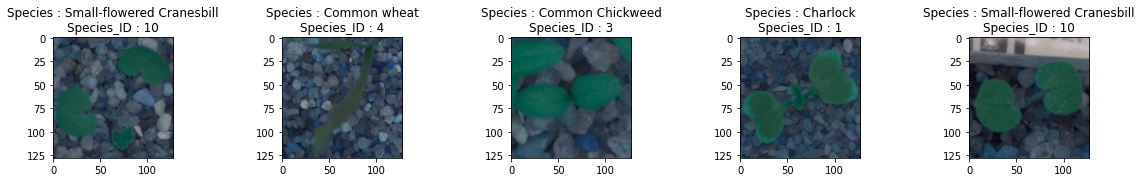

In [24]:
def show_images(show, image , species , label):
  fig , axs = plt.subplots(1 , show , figsize = (18 , 10))
  plt.subplots_adjust(left = 0.1 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.9 , hspace = 0.4)
  for i in range(0, show):
    n = np.random.randint(0 , len(data) , size = show)
    n = n[0]
    axs[i].imshow(image[n] , label = label[n])
    axs[i].set_title('Species : {}\nSpecies_ID : {}'.format(label[n] , species[n]))
        
show_images(5 , data , species , labels)

# 2. Data preprocessing

#### Create X & Y from the DataFrame

In [25]:
images = list(train_df['Image_Array'])
images = np.concatenate([images] , axis = 0)

classes = list(train_df['Species_Id'])
classes = np.concatenate([classes] , axis = 0)

In [26]:
images , classes = shuffle(images , classes , random_state = 42)

#### Split the data into train and test data

In [27]:
X_train , X_test , val_train , val_test = train_test_split(images , classes , test_size = 0.25 , random_state = 42)

#### Unify shape of all the images
  - The shapes of all the images have all been unified as part of a previous step.
  - Shape of the unified images is (128 , 128 , 3)

#### Print shape of training and testing datasets

In [28]:
print('Shape of the X_train data : ' , X_train.shape)
print('Shape of the X_test data : ' , X_test.shape)

print('Shape of the validation train data : ' , val_train.shape)
print('Shape of the validation test data : ' , val_test.shape)

Shape of the X_train data :  (3562, 128, 128, 3)
Shape of the X_test data :  (1188, 128, 128, 3)
Shape of the validation train data :  (3562,)
Shape of the validation test data :  (1188,)


#### Convert the datatype to float32

In [29]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#### Normalise all the images.

In [30]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#### Encode labels of the images

In [31]:
val_train = utils.to_categorical(val_train)
val_test = utils.to_categorical(val_test)
val_test.shape

(1188, 12)

# 3. Model Training

## Part-1

#### Create a baseline CNN architecture to train the model.



In [32]:
epochs = 50
rows , columns = 128 , 128
batch_size = 32
n_classes = val_test.shape[1]

#### Function for creating a Sequential CNN model.


In [33]:
def cnn_model():
  model = Sequential()
  model.add(layers.Conv2D(32 , (3 , 3) , activation = 'relu' , input_shape = (rows , columns , 3)))
  model.add(layers.MaxPool2D((2 , 2)))
  model.add(layers.Conv2D(32 , (5 , 5), activation = 'relu'))
  model.add(layers.MaxPool2D((3 , 3)))
  model.add(layers.Flatten())
  model.add(layers.Dense(128 , activation = 'relu'))
  model.add(layers.Dense(n_classes , activation = 'softmax'))
  return model

model = cnn_model()

#### Compiling the model

In [34]:
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

#### Model Checkpoint

In [35]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

#### Training the model

In [36]:
model_fit = model.fit(X_train , val_train , 
             epochs = epochs , 
             batch_size = batch_size , 
             validation_data = (X_test , val_test) , 
             callbacks = [callbacks_list])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 2.2952 - accuracy: 0.2027
Epoch 1: val_loss improved from inf to 1.98258, saving model to Weights-001--1.98258.hdf5
112/112 [==============================] - 14s 23ms/step - loss: 2.2952 - accuracy: 0.2027 - val_loss: 1.9826 - val_accuracy: 0.3350
Epoch 2/50
111/112 [============================>.] - ETA: 0s - loss: 1.6405 - accuracy: 0.4198
Epoch 2: val_loss improved from 1.98258 to 1.42530, saving model to Weights-002--1.42530.hdf5
112/112 [==============================] - 2s 18ms/step - loss: 1.6405 - accuracy: 0.4200 - val_loss: 1.4253 - val_accuracy: 0.5210
Epoch 3/50
112/112 [==============================] - ETA: 0s - loss: 1.3707 - accuracy: 0.5157
Epoch 3: val_loss improved from 1.42530 to 1.27642, saving model to Weights-003--1.27642.hdf5
112/112 [==============================] - 2s 18ms/step - loss: 1.3707 - accuracy: 0.5157 - val_loss: 1.2764 - val_accuracy: 0.5379
Epoch 4/50
111/112 [=================

#### Plotting the accuracy and loss for model 1

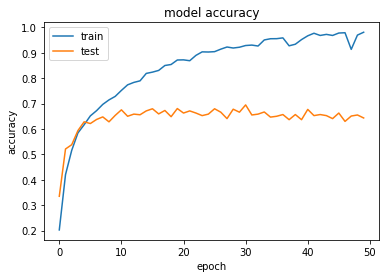

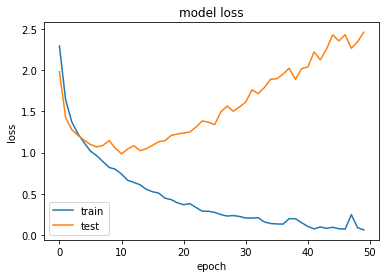

In [37]:
import matplotlib.pyplot as plt

plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### Evaluating the model

In [38]:
model.evaluate(X_test , val_test , verbose = 1)

38/38 [==============================] - 0s 9ms/step - loss: 2.4623 - accuracy: 0.6431


[2.4622766971588135, 0.6430976390838623]

In [39]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 59, 59, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 19, 19, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 11552)             0         
                                                                 
 dense (Dense)               (None, 128)               1

### Predict label data of the test data and check confusion matrix

In [40]:
import numpy as np

y_pred = np.argmax(model.predict(X_test) , axis = -1)
y_pred

array([ 5, 11,  3, ...,  7,  9,  1])

- To print the confusion matrix, I use the maxarg function on the validataion test set to give me the class of interest instead of the one hot encoded variables.

In [41]:
val_test_1 = np.argmax(val_test , axis = -1)
val_test_1

array([5, 8, 3, ..., 7, 3, 1])

In [42]:
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(val_test_1 , y_pred))
print(classification_report(val_test_1 , y_pred))

[[ 31   0   0   0   7   6  17   0   1   0   0   3]
 [  0  70   0   2   0   2   0   6   3   4   7   3]
 [  1   4  46   0   1   4   0   0  11   2   0   2]
 [  0   3   1 121   0   3   0  11   8  14   4   5]
 [ 13   0   0   0  19  10   6   0   2   2   0   3]
 [  1   3   3   0   1  76   2   2   1   3   2   3]
 [ 61   0   3   1  17  15  67   0   2   0   2   1]
 [  0   1   1   2   0   4   0  40   2   3   4   2]
 [  1   1   4   4   1   1   3   6 100   5   1   7]
 [  0   0   3   7   0   4   0   3   7  23   1   1]
 [  0   4   0   3   0   3   0   0   0   8 115   1]
 [  1   2   1   4   1   8   1   3   8   0   3  56]]
              precision    recall  f1-score   support

           0       0.28      0.48      0.36        65
           1       0.80      0.72      0.76        97
           2       0.74      0.65      0.69        71
           3       0.84      0.71      0.77       170
           4       0.40      0.35      0.37        55
           5       0.56      0.78      0.65        97
        

### Display test images along with their actual and predicted labels for a few samples

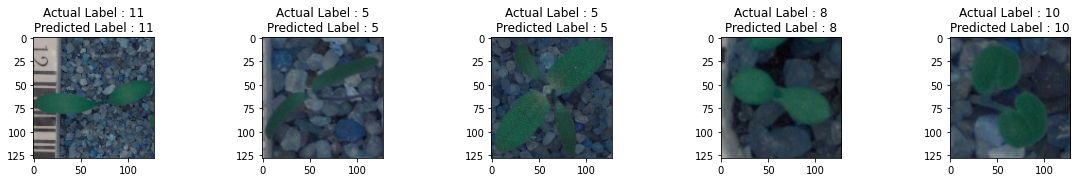

In [43]:
def show_images(show, image , actual_label , pred_label):
  fig , axs = plt.subplots(1 , show , figsize = (18 , 10))
  plt.subplots_adjust(left = 0.1 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.9 , hspace = 0.4)
  for i in range(0, show):
    n = np.random.randint(0 , len(X_test) , size = show)
    n = n[0]
    axs[i].imshow(image[n] , label = pred_label[n])
    axs[i].set_title('Actual Label : {}\nPredicted Label : {}'.format(actual_label[n] , pred_label[n]))
        
show_images(5 , X_test , val_test_1 , y_pred)

#### Observation from model-1:
  - Based on the model training and the confustion matrix, I can clearly state that the model is overfitting on the training data.
  - The best validataion loss that I got from the above model was 0.77705 and the validation accuracy was 73%.
  - I will try to build a slightly more complex model to see if I can overcome the overfitting on the training data and try to improve the overall performance.

## Part-2

#### Function for creating a Sequential CNN model.

In [44]:
def cnn_model2():
  model2 = Sequential()
  model2.add(Conv2D(filters = 32, kernel_size = (3 , 3) , strides = (1 , 1) , padding = 'same' , activation = 'relu' , kernel_initializer = 'he_normal' , input_shape = (rows , columns , 3)))
  model2.add(MaxPooling2D(pool_size = (2 , 2) , padding = 'same'))
  model2.add(tf.keras.layers.BatchNormalization(axis = 3))
  model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'))
  model2.add(MaxPooling2D(pool_size = (2 , 2) , padding = 'same'))
  model2.add(tf.keras.layers.BatchNormalization(axis = 3))
  model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'))
  model2.add(MaxPooling2D(pool_size = (2 , 2) , padding = 'same'))
  model2.add(tf.keras.layers.BatchNormalization(axis = 3))
  model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'))
  model2.add(MaxPooling2D(pool_size = (2 , 2) , padding = 'same'))
  model2.add(Dropout(0.15))
  model2.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', kernel_initializer='he_normal'))
  model2.add(MaxPooling2D(pool_size = (2 , 2) , padding = 'same'))
  model2.add(Dropout(0.15))
  model2.add(Flatten())
  model2.add(Dense(300 , activation = 'relu'))
  model2.add(Dropout(0.4))
  model2.add(Dense(250 , activation = 'relu'))
  model2.add(Dense(n_classes , activation = 'softmax'))
  return model2

model2 = cnn_model2()

#### Compiling the model

In [45]:
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])

#### Model Checkpoint

In [46]:
checkpoint_name1 = 'Weights1-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint1 = ModelCheckpoint(checkpoint_name1, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list1 = [checkpoint1]

#### Training the model

In [47]:
model2_fit = model2.fit(X_train , val_train , 
             epochs = epochs , 
             batch_size = batch_size , 
             validation_data = (X_test , val_test) , 
             callbacks = [callbacks_list1])

Epoch 1/50
112/112 [==============================] - ETA: 0s - loss: 2.1019 - accuracy: 0.2799
Epoch 1: val_loss improved from inf to 3.08322, saving model to Weights1-001--3.08322.hdf5
112/112 [==============================] - 4s 26ms/step - loss: 2.1019 - accuracy: 0.2799 - val_loss: 3.0832 - val_accuracy: 0.1423
Epoch 2/50
110/112 [============================>.] - ETA: 0s - loss: 1.4295 - accuracy: 0.5009
Epoch 2: val_loss did not improve from 3.08322
112/112 [==============================] - 2s 19ms/step - loss: 1.4265 - accuracy: 0.5020 - val_loss: 4.2522 - val_accuracy: 0.1439
Epoch 3/50
110/112 [============================>.] - ETA: 0s - loss: 1.1372 - accuracy: 0.6187
Epoch 3: val_loss improved from 3.08322 to 1.93493, saving model to Weights1-003--1.93493.hdf5
112/112 [==============================] - 2s 19ms/step - loss: 1.1361 - accuracy: 0.6190 - val_loss: 1.9349 - val_accuracy: 0.2845
Epoch 4/50
111/112 [============================>.] - ETA: 0s - loss: 0.9975 - accu

#### Plotting the accuracy and loss for model 2

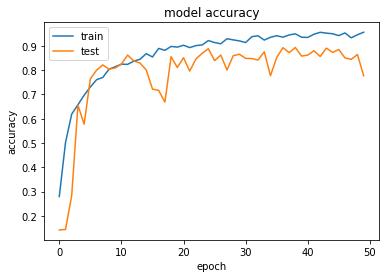

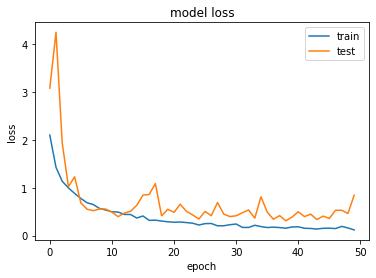

In [48]:
import matplotlib.pyplot as plt

plt.plot(model2_fit.history['accuracy'])
plt.plot(model2_fit.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()
# summarize history for loss
plt.plot(model2_fit.history['loss'])
plt.plot(model2_fit.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

#### Evaluating the model

In [49]:
model2.evaluate(X_test , val_test , verbose = 1)

38/38 [==============================] - 0s 8ms/step - loss: 0.8441 - accuracy: 0.7769


[0.8441020250320435, 0.7769360542297363]

In [50]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                      

#### Predict label data of the test data and check confusion matrix

In [51]:
import numpy as np

y_pred1 = np.argmax(model2.predict(X_test) , axis = -1)
y_pred1

array([ 5, 11,  3, ...,  7,  3,  1])

- To print the confusion matrix, I print use the maxarg function on the validataion test set to give me the class of interest instead of the one hot encoded variables.

In [52]:
from sklearn.metrics import confusion_matrix , classification_report

print(confusion_matrix(val_test_1 , y_pred1))
print(classification_report(val_test_1 , y_pred1))

[[ 50   0   0   0   4   3   7   0   0   0   0   1]
 [  0  93   2   0   1   0   0   0   0   0   1   0]
 [  0   8  59   0   2   2   0   0   0   0   0   0]
 [  0   0   1 142   1  11   0   1   4   1   7   2]
 [  2   0   1   0  49   3   0   0   0   0   0   0]
 [  0   2   2   0   1  92   0   0   0   0   0   0]
 [ 91   0   0   0   1   2  74   0   1   0   0   0]
 [  0   4   0   0   0   3   0  52   0   0   0   0]
 [  2   8   1   0   1   9   0   1  94   7   1  10]
 [  0   9   0   0   1   5   0   1   4  17   8   4]
 [  0   8   0   0   0   4   0   2   0   0 120   0]
 [  0   1   1   0   3   1   0   1   0   0   0  81]]
              precision    recall  f1-score   support

           0       0.34      0.77      0.48        65
           1       0.70      0.96      0.81        97
           2       0.88      0.83      0.86        71
           3       1.00      0.84      0.91       170
           4       0.77      0.89      0.82        55
           5       0.68      0.95      0.79        97
        

### Display test images along with their actual and predicted labels for a few samples

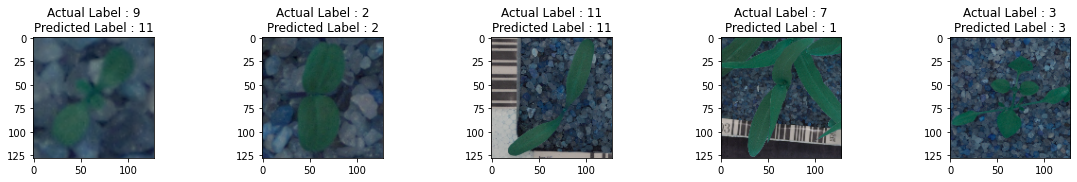

In [53]:
def show_images(show, image , actual_label , pred_label):
  fig , axs = plt.subplots(1 , show , figsize = (18 , 10))
  plt.subplots_adjust(left = 0.1 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.9 , hspace = 0.4)
  for i in range(0, show):
    n = np.random.randint(0 , len(X_test) , size = show)
    n = n[0]
    axs[i].imshow(image[n] , label = pred_label[n])
    axs[i].set_title('Actual Label : {}\nPredicted Label : {}'.format(actual_label[n] , pred_label[n]))
        
show_images(5 , X_test , val_test_1 , y_pred1)

#### Observation from model-2:

  - The best validataion loss that I got from the above model was 0.34373 and the validation accuracy was 84%. 
  - The reason that both the models are overfitting could be because of the shortage of data that we have.
  - To improve the performance of our model, we would need to collect additional data and also train our model with the best hyperparameters that we can find by tuning them.


## Predicting the images for the separate (unseen) test dataset

In [54]:
len(os.listdir(test_path))

794

#### Creating a dataframe with the test images

In [55]:
image = []
resized_image = []

for img in os.listdir(file_path + '/Plant_Seedlings_Classification/' + '/test/'):
  test_image = cv2.imread(file_path + '/Plant_Seedlings_Classification/' + '/test/' + '/' + img)
  test_image_resize = cv2.resize(test_image , (128 , 128))
  image.append(img)
  resized_image.append(test_image_resize)

In [56]:
test_df = pd.DataFrame(list(zip(image , resized_image)) , 
                        columns = ['File' , 'Resized_Image'])
test_df

,File,Resized_Image
0,0021e90e4.png,"[[[93, 112, 128], [105, 121, 135], [107, 122, ..."
1,003d61042.png,"[[[75, 104, 130], [72, 106, 134], [84, 119, 14..."
2,007b3da8b.png,"[[[78, 111, 132], [77, 108, 132], [71, 103, 12..."
3,0086a6340.png,"[[[32, 39, 53], [29, 38, 52], [25, 33, 47], [3..."
4,00c47e980.png,"[[[73, 87, 98], [79, 93, 101], [76, 87, 94], [..."
...,...,...
789,fea355851.png,"[[[46, 58, 76], [45, 59, 74], [48, 63, 76], [3..."
790,fea3da57c.png,"[[[51, 70, 89], [57, 75, 89], [50, 66, 83], [4..."
791,fef2ade8c.png,"[[[75, 92, 107], [67, 87, 104], [71, 91, 106],..."
792,ff65bc002.png,"[[[38, 64, 88], [40, 70, 96], [45, 75, 101], [..."


In [57]:
resized_img_shape = list(test_df['Resized_Image'])
resized_img_shape = np.concatenate([resized_img_shape] , axis = 0)
resized_img_shape.shape

(794, 128, 128, 3)

#### Converting the datatype and normalizing the images

In [58]:
resized_img_scaled = resized_img_shape.astype('float32') / 255.0

#### Predict the species on the test(unseen) dataset

  - I am going to use the second model to predict the labels for the test dataset as the accuracy was higher and the loss was lower when compared to the first model.

In [59]:
test_df_pred = np.argmax(model2.predict(resized_img_scaled) , axis = -1)
test_df_pred


array([10,  5,  2,  3, 11,  6,  3,  5,  6,  6,  5, 10, 11,  5, 11,  5,  9,
        8,  3,  2,  3, 10,  5,  5, 11,  7, 11,  8,  3, 11,  3,  9,  5,  7,
        6,  0,  0,  6,  3,  7,  6,  4,  5, 10, 11,  5,  1,  8,  7, 10,  6,
       11,  2,  6,  7,  5,  1, 10,  2,  6, 11,  2,  1,  4,  7,  5,  6,  6,
        1,  8, 10,  5,  8,  3,  5,  4,  6,  9,  9,  6, 11,  3,  3,  4,  1,
       11,  2,  1,  5,  0,  1,  6,  5,  6,  3,  6, 10,  9,  1,  1,  5,  5,
        8, 11,  5,  5,  3,  1,  2,  2,  6,  1,  3,  9,  9, 11,  2,  1, 11,
        3,  5, 11,  2,  6,  1,  4,  1,  1,  5,  3, 11, 11,  3,  3,  5,  4,
        5,  1,  5,  3,  6, 10,  9,  3,  5, 11,  4, 10, 11,  1,  8,  6,  7,
       11,  6, 10,  3,  5,  0,  2,  1,  0,  8,  6,  1,  0,  5,  4,  5,  3,
       10,  7,  9,  3,  3, 10,  5,  2,  0,  0,  6, 10,  0,  5, 11,  4,  3,
        5,  5, 10,  6,  1, 11,  0,  1,  0,  4,  3,  6,  5,  2,  6,  1,  1,
       10,  2,  5,  3,  5,  1,  5,  1,  4,  4, 10,  2,  7,  0, 10,  3,  5,
        5, 10, 10,  4,  4

### Display test images along with their actual and predicted labels for a few samples

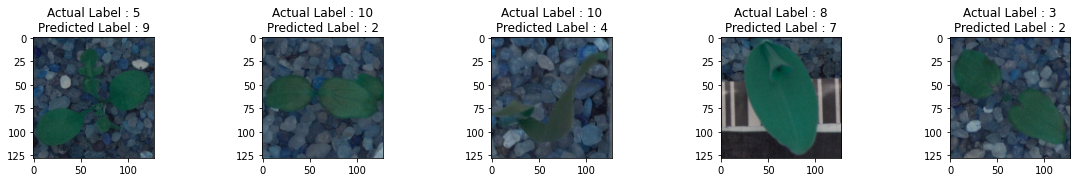

In [60]:
def show_images(show, image , actual_label , pred_label):
  fig , axs = plt.subplots(1 , show , figsize = (18 , 10))
  plt.subplots_adjust(left = 0.1 , bottom = 0.1 , right = 0.9 , top = 0.9 , wspace = 0.9 , hspace = 0.4)
  for i in range(0, show):
    n = np.random.randint(0 , len(resized_img_shape) , size = show)
    n = n[0]
    axs[i].imshow(image[n] , label = pred_label[n])
    axs[i].set_title('Actual Label : {}\nPredicted Label : {}'.format(actual_label[n] , pred_label[n]))
        
show_images(5 , resized_img_shape , val_test_1 , test_df_pred)

#### Final dataframe for submission on the test(unseen) dataset

In [61]:
test_df['Predicted_Labels'] = test_df_pred
test_df.drop(['Resized_Image'] , axis = 1 , inplace = True)
test_df

,File,Predicted_Labels
0,0021e90e4.png,10
1,003d61042.png,5
2,007b3da8b.png,2
3,0086a6340.png,3
4,00c47e980.png,11
...,...,...
789,fea355851.png,6
790,fea3da57c.png,11
791,fef2ade8c.png,11
792,ff65bc002.png,1
